In [75]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt

## Download Data

### Bank Marketing

In [2]:
bank_marketing = fetch_ucirepo(id=222)
X_bm = bank_marketing.data.features
Y_bm = bank_marketing.data.targets

### Adult Income

In [50]:
adult = fetch_ucirepo(id=2)
X_adult = adult.data.features
Y_adult = adult.data.targets

### Skin Segmentation

In [4]:
skin_segmentation = fetch_ucirepo(id=229) 
X_sk = skin_segmentation.data.features 
Y_sk = skin_segmentation.data.targets

### Credit Card Defaults

In [5]:
default_of_credit_card_clients = fetch_ucirepo(id=350) 
X_cc = default_of_credit_card_clients.data.features 
Y_cc = default_of_credit_card_clients.data.targets

## Clean the Data

### Bank Marketing

In [6]:
X_bm = X_bm.fillna('unknown')
X_bm = pd.get_dummies(X_bm, columns=X_bm.select_dtypes(include=['object']).columns).astype(int)
X_bm = X_bm.to_numpy()
X_bm

array([[  58, 2143,    5, ...,    0,    0,    1],
       [  44,   29,    5, ...,    0,    0,    1],
       [  33,    2,    5, ...,    0,    0,    1],
       ...,
       [  72, 5715,   17, ...,    0,    1,    0],
       [  57,  668,   17, ...,    0,    0,    1],
       [  37, 2971,   17, ...,    1,    0,    0]])

In [8]:
Y_bm.loc[:, 'y'] = Y_bm['y'].map({'yes': 1, 'no': 0})
Y_bm = Y_bm.to_numpy().astype(int)
Y_bm

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [33]:
X_bm_sample, Y_bm_sample = resample(X_bm, Y_bm, n_samples=10000, random_state=123, stratify=Y_bm)
X_bm_sample.shape, Y_bm_sample.shape

((10000, 51), (10000, 1))

### Adult Income

In [51]:
X_adult = pd.get_dummies(X_adult, columns=X_adult.select_dtypes(include=['object']).columns).astype(int)

no_na_indices = X_adult.dropna().index
X_adult = X_adult.loc[no_na_indices].values

X_adult

array([[    39,  77516,     13, ...,      1,      0,      0],
       [    50,  83311,     13, ...,      1,      0,      0],
       [    38, 215646,      9, ...,      1,      0,      0],
       ...,
       [    38, 374983,     13, ...,      1,      0,      0],
       [    44,  83891,     13, ...,      1,      0,      0],
       [    35, 182148,     13, ...,      1,      0,      0]])

In [52]:
Y_adult.loc[:, 'income'] = Y_adult['income'].map({'<=50K': 0, '<=50K.': 0, '>50K.': 1, '>50K': 1})
Y_adult = Y_adult.loc[no_na_indices]
Y_adult = Y_adult.to_numpy().astype(int)
Y_adult

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [56]:
X_adult_sample, Y_adult_sample = resample(X_adult, Y_adult, n_samples=10000, random_state=123, stratify=Y_adult)
X_adult_sample.shape, Y_adult_sample.shape

((10000, 108), (10000, 1))

### Skin Segmentation

In [14]:
X_sk = X_sk.to_numpy()
X_sk

array([[ 74,  85, 123],
       [ 73,  84, 122],
       [ 72,  83, 121],
       ...,
       [163, 162, 112],
       [163, 162, 112],
       [255, 255, 255]])

In [16]:
Y_sk.loc[:, 'y'] = Y_sk['y'].map({1: 0, 2: 1})
Y_sk = Y_sk.to_numpy().astype(int)
Y_sk

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [57]:
X_sk_sample, Y_sk_sample = resample(X_sk, Y_sk, n_samples=10000, random_state=123, stratify=Y_sk)
X_sk_sample.shape, Y_sk_sample.shape

((10000, 3), (10000, 1))

### Credit Card Defaults

In [18]:
X_cc = X_cc.to_numpy()
X_cc

array([[ 20000,      2,      2, ...,      0,      0,      0],
       [120000,      2,      2, ...,   1000,      0,   2000],
       [ 90000,      2,      2, ...,   1000,   1000,   5000],
       ...,
       [ 30000,      1,      2, ...,   4200,   2000,   3100],
       [ 80000,      1,      3, ...,   1926,  52964,   1804],
       [ 50000,      1,      2, ...,   1000,   1000,   1000]])

In [20]:
Y_cc = Y_cc.to_numpy().astype(int)
Y_cc

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [58]:
X_cc_sample, Y_cc_sample = resample(X_cc, Y_cc, n_samples=10000, random_state=123, stratify=Y_cc)
X_cc_sample.shape, Y_cc_sample.shape

((10000, 23), (10000, 1))

## Create Model

In [59]:
datasets = {
    'bm': (X_bm_sample, Y_bm_sample),
    'adult': (X_adult_sample, Y_adult_sample),
    'sk': (X_sk_sample, Y_sk_sample),
    'cc': (X_cc_sample, Y_cc_sample)
}

In [192]:
classifiers = {
    'SVM': {
        'model': SVC(),
        'param_grid': {
            'kernel': ['linear', 'rbf'],
            'C': [0.1, 1],
            'gamma': [0.001, 0.01],
        },
    },
    'Neural Network': {
        'model': MLPClassifier(max_iter=1000),
        'param_grid': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'activation': ['relu', 'tanh'],
            'alpha': [0.0001, 0.001],
            'learning_rate': ['constant'],
        },
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'param_grid': {
            'C': [0.01, 0.1, 1],
            'penalty': ['l2'],
        },
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 10],
            'weights': ['uniform', 'distance'],
        },
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, 100],
            'min_samples_split': [2, 5],
        },
    },
}

In [193]:
partitions = {
    '20/80': 0.8,
    '50/50': 0.5,
    '80/20': 0.2
}

In [194]:
results = []

for dataset_name, dataset in datasets.items():
    X, Y = dataset[0], dataset[1]
    Y = Y.ravel()
    for partition_name, test_size in partitions.items():
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
        for clf_name, clf_info in classifiers.items():
            print(f'Processing: {dataset_name}, Classifier: {clf_name}, Partition: {partition_name}')
            
            if clf_name != 'Random Forest':
                pipeline = Pipeline([
                    ('scaler', StandardScaler()),
                    ('model', clf_info['model'])
                ])
                param_grid = {'model__' + k: v for k, v in clf_info['param_grid'].items()}
            else:
                pipeline = clf_info['model']
                param_grid = clf_info['param_grid']

            grid_search = GridSearchCV(
                estimator=pipeline,
                param_grid=param_grid,
                cv=3,
                scoring='accuracy',
                n_jobs=-1,
                verbose=3,
                return_train_score=True
            )

            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            cv_results = grid_search.cv_results_
            
            avg_train_accuracy = np.mean(cv_results['mean_train_score'])
            avg_val_accuracy = np.mean(cv_results['mean_test_score'])
            test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

            results.append({
                'Dataset': dataset_name,
                'Classifier': clf_name,
                'Partition': partition_name,
                'Best Hyperparameters': grid_search.best_params_,
                'Train Accuracy (Avg)': avg_train_accuracy,
                'Validation Accuracy (Avg)': avg_val_accuracy,
                'Test Accuracy (Avg)': test_accuracy,
                'CV Results': cv_results
            })

Processing: bm, Classifier: SVM, Partition: 20/80
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Processing: bm, Classifier: Neural Network, Partition: 20/80
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Processing: bm, Classifier: Logistic Regression, Partition: 20/80
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Processing: bm, Classifier: KNN, Partition: 20/80
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Processing: bm, Classifier: Random Forest, Partition: 20/80
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Processing: bm, Classifier: SVM, Partition: 50/50
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Processing: bm, Classifier: Neural Network, Partition: 50/50
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Processing: bm, Classifier: Logistic Regression, Partition: 50/50
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Processing: bm, Classifier: KNN, Partition: 50/50
Fitti

C:\ProgramData\anaconda3\envs\cogs118a\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Processing: cc, Classifier: Logistic Regression, Partition: 20/80
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Processing: cc, Classifier: KNN, Partition: 20/80
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Processing: cc, Classifier: Random Forest, Partition: 20/80
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Processing: cc, Classifier: SVM, Partition: 50/50
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Processing: cc, Classifier: Neural Network, Partition: 50/50
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Processing: cc, Classifier: Logistic Regression, Partition: 50/50
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Processing: cc, Classifier: KNN, Partition: 50/50
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Processing: cc, Classifier: Random Forest, Partition: 50/50
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Processing: cc, Classifier: SVM, Partition: 80/20
Fittin

In [195]:
results_df = pd.DataFrame(results)

In [196]:
results_df

,Dataset,Classifier,Partition,Best Hyperparameters,Train Accuracy (Avg),Validation Accuracy (Avg),Test Accuracy (Avg),CV Results
0,bm,SVM,20/80,"{'model__C': 1, 'model__gamma': 0.001, 'model_...",0.898844,0.889061,0.899125,"{'mean_fit_time': [0.029143651326497395, 0.029..."
1,bm,Neural Network,20/80,"{'model__activation': 'tanh', 'model__alpha': ...",0.999313,0.879664,0.891750,"{'mean_fit_time': [1.5463921229044597, 2.04600..."
2,bm,Logistic Regression,20/80,"{'model__C': 1, 'model__penalty': 'l2'}",0.905833,0.893164,0.903125,"{'mean_fit_time': [0.005499124526977539, 0.006..."
3,bm,KNN,20/80,"{'model__n_neighbors': 10, 'model__weights': '...",0.956000,0.885913,0.889500,"{'mean_fit_time': [0.002374728520711263, 0.003..."
4,bm,Random Forest,20/80,"{'max_depth': 100, 'min_samples_split': 5, 'n_...",0.981583,0.892025,0.902875,"{'mean_fit_time': [0.11494175593058269, 0.2248..."
5,bm,SVM,50/50,"{'model__C': 1, 'model__gamma': 0.01, 'model__...",0.898013,0.894400,0.895800,"{'mean_fit_time': [0.26605860392252606, 0.2398..."
6,bm,Neural Network,50/50,"{'model__activation': 'tanh', 'model__alpha': ...",0.999067,0.890602,0.899600,"{'mean_fit_time': [5.4657260576883955, 5.79997..."
7,bm,Logistic Regression,50/50,"{'model__C': 0.1, 'model__penalty': 'l2'}",0.905434,0.903934,0.906200,"{'mean_fit_time': [0.014313062032063803, 0.015..."
8,bm,KNN,50/50,"{'model__n_neighbors': 10, 'model__weights': '...",0.957283,0.892401,0.902000,"{'mean_fit_time': [0.010284900665283203, 0.010..."
9,bm,Random Forest,50/50,"{'max_depth': 20, 'min_samples_split': 2, 'n_e...",0.975878,0.904812,0.913000,"{'mean_fit_time': [0.20639308293660483, 0.3936..."


## Plotting Accuracy Curves WRT Hyperparameters

In [220]:
def plot_acc_wrt_hp(model, param_grid, cv_results, dataset_name):
    clf_name = model
    for param_name in param_grid:
        param_values = cv_results[param_name]
        
    
        unique_param_values = np.unique(param_values)
    
        train_scores = []
        test_scores = []
    
        for value in unique_param_values:
            indices = np.where(param_values == value)[0]
            train_scores.append(np.mean(cv_results['mean_train_score'][indices]))
            test_scores.append(np.mean(cv_results['mean_test_score'][indices]))
        
        plt.figure(figsize=(8, 6))
        plt.plot(unique_param_values, train_scores, label='Train Accuracy', marker='o')
        plt.plot(unique_param_values, test_scores, label='Validation Accuracy', marker='o')
        plt.xlabel(param_name)
        plt.ylabel('Accuracy')
        plt.title(f'{clf_name} - Accuracy vs {param_name} ({dataset_name}, 50/50)')
        plt.legend()
        plt.grid(True)
        plt.show()

In [214]:
bm_svm_5050 = results_df.iloc[5]['CV Results']
bm_nn_5050 = results_df.iloc[6]['CV Results']
bm_lr_5050 = results_df.iloc[7]['CV Results']
bm_knn_5050 = results_df.iloc[8]['CV Results']
bm_rf_5050 = results_df.iloc[9]['CV Results']

adult_svm_5050 = results_df.iloc[20]['CV Results']
adult_nn_5050 = results_df.iloc[21]['CV Results']
adult_lr_5050 = results_df.iloc[22]['CV Results']
adult_knn_5050 = results_df.iloc[23]['CV Results']
adult_rf_5050 = results_df.iloc[24]['CV Results']

sk_svm_5050 = results_df.iloc[35]['CV Results']
sk_nn_5050 = results_df.iloc[36]['CV Results']
sk_lr_5050 = results_df.iloc[37]['CV Results']
sk_knn_5050 = results_df.iloc[38]['CV Results']
sk_rf_5050 = results_df.iloc[39]['CV Results']

cc_svm_5050 = results_df.iloc[50]['CV Results']
cc_nn_5050 = results_df.iloc[51]['CV Results']
cc_lr_5050 = results_df.iloc[52]['CV Results']
cc_knn_5050 = results_df.iloc[53]['CV Results']
cc_rf_5050 = results_df.iloc[54]['CV Results']

In [206]:
param_grid_svm = ['param_model__C', 'param_model__gamma', 'param_model__kernel']
param_grid_nn = ['param_model__activation', 'param_model__alpha']
param_grid_lr = ['param_model__C']
param_grid_knn = ['param_model__n_neighbors', 'param_model__weights']
param_grid_rf = ['param_max_depth', 'param_min_samples_split', 'param_n_estimators']

### SVM Accuracy WRT Hyperparameters

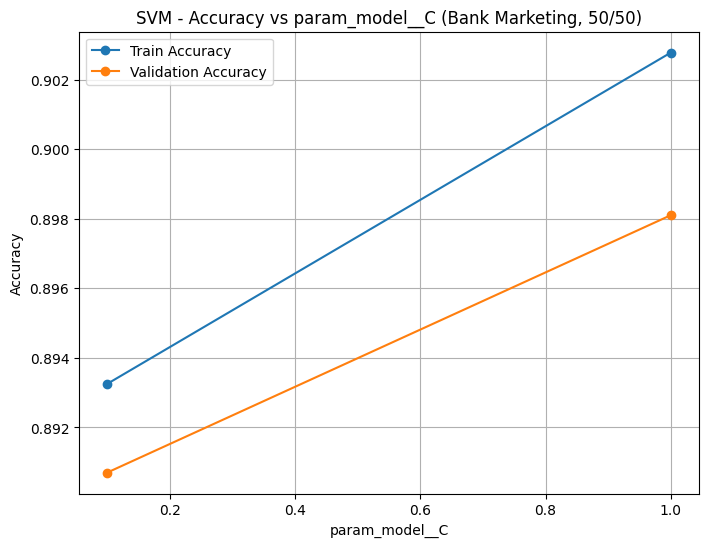

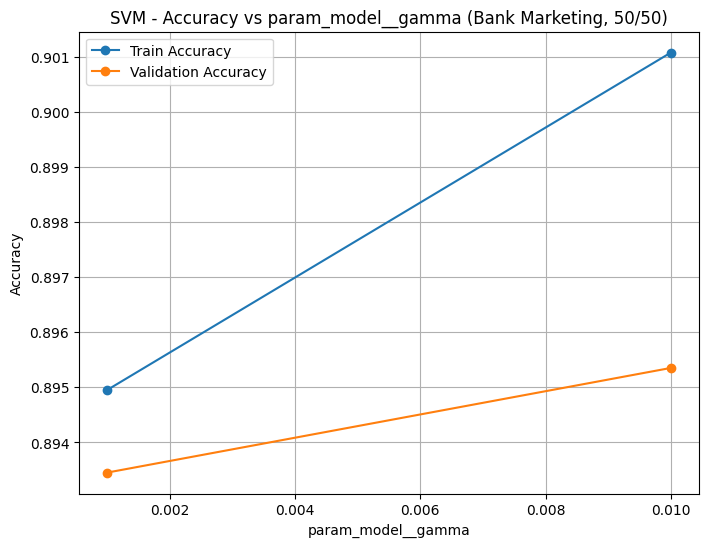

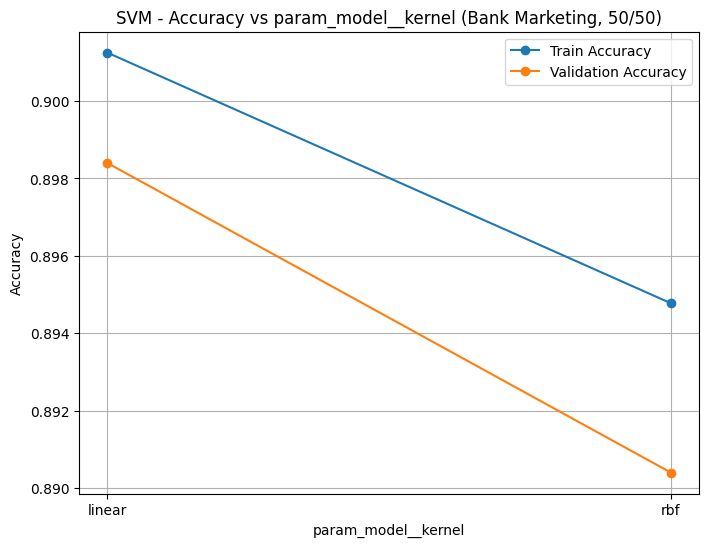

In [222]:
plot_acc_wrt_hp('SVM', param_grid_svm, bm_svm_5050, 'Bank Marketing')

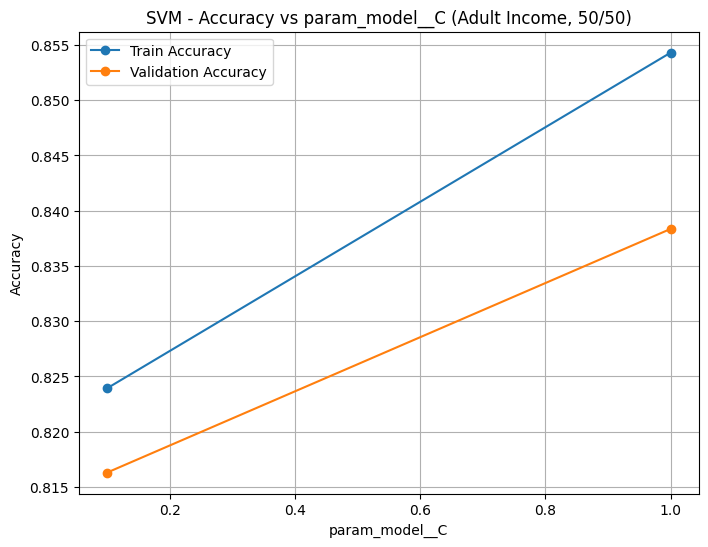

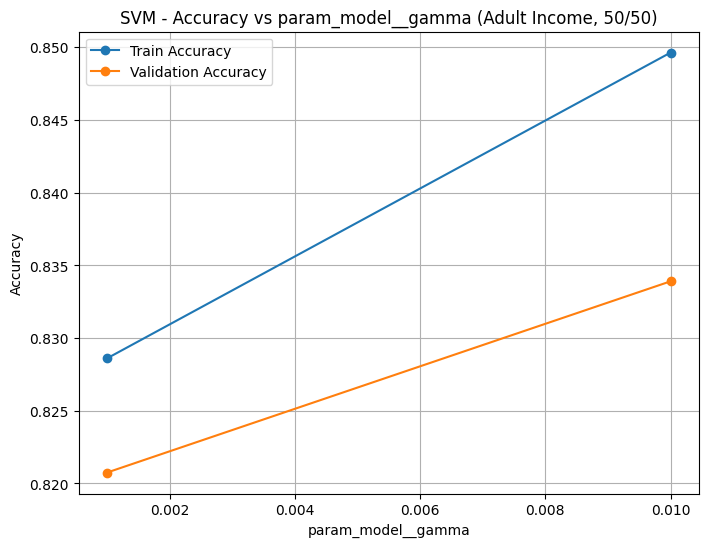

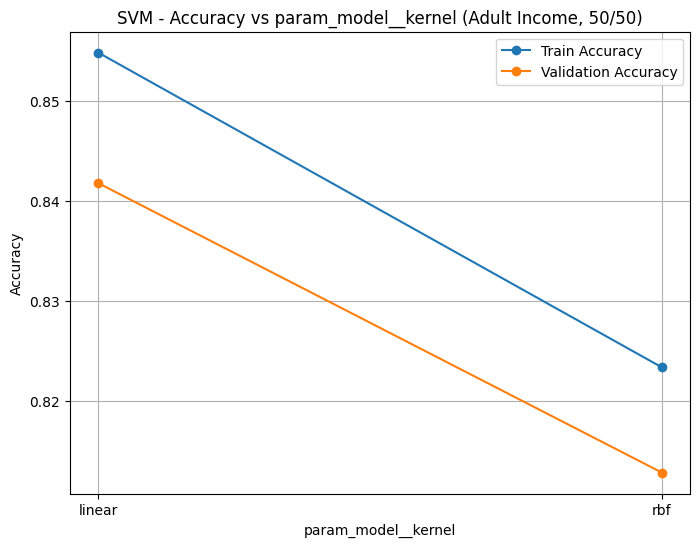

In [223]:
plot_acc_wrt_hp('SVM', param_grid_svm, adult_svm_5050, 'Adult Income')

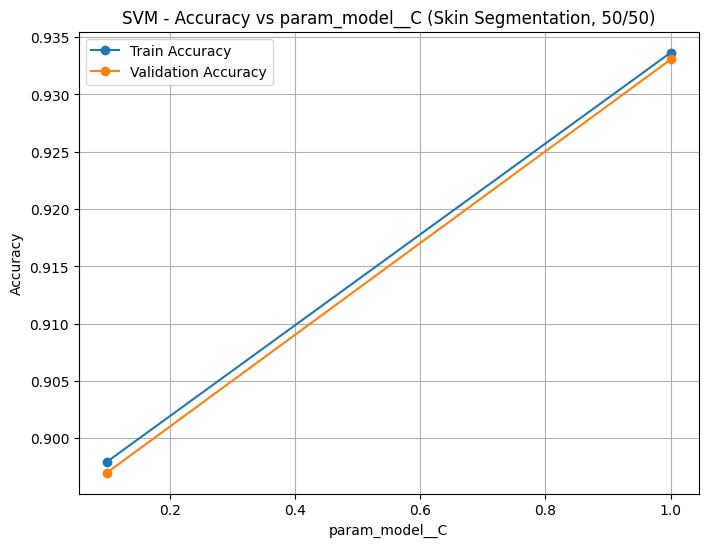

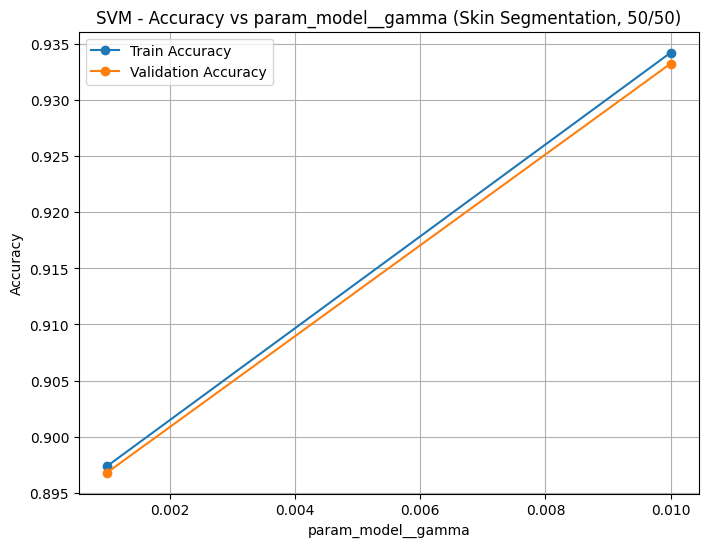

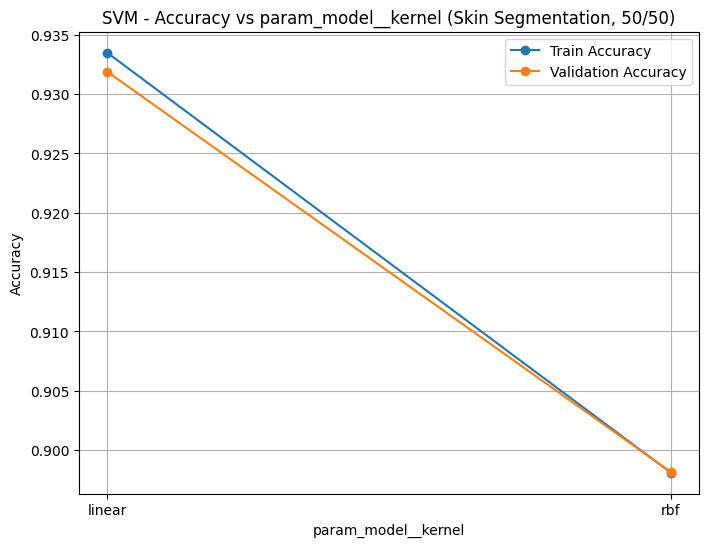

In [224]:
plot_acc_wrt_hp('SVM', param_grid_svm, sk_svm_5050, 'Skin Segmentation')

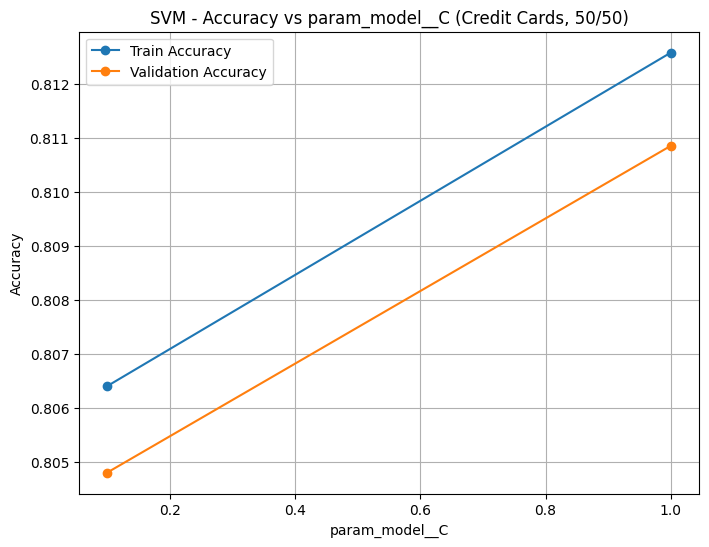

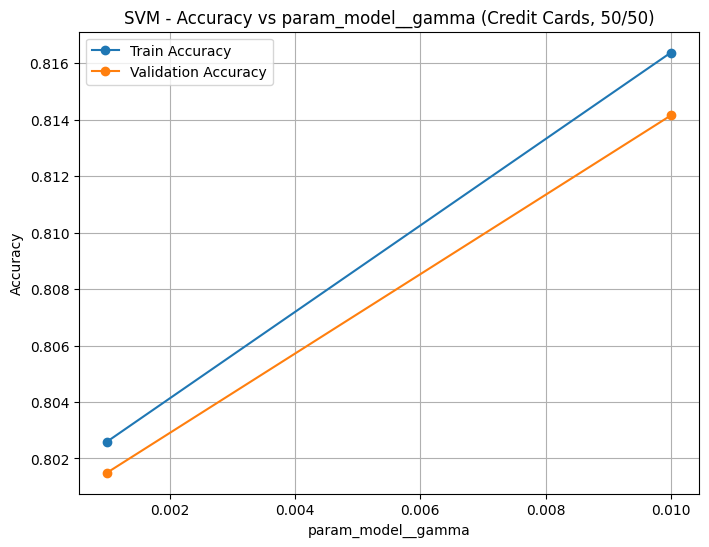

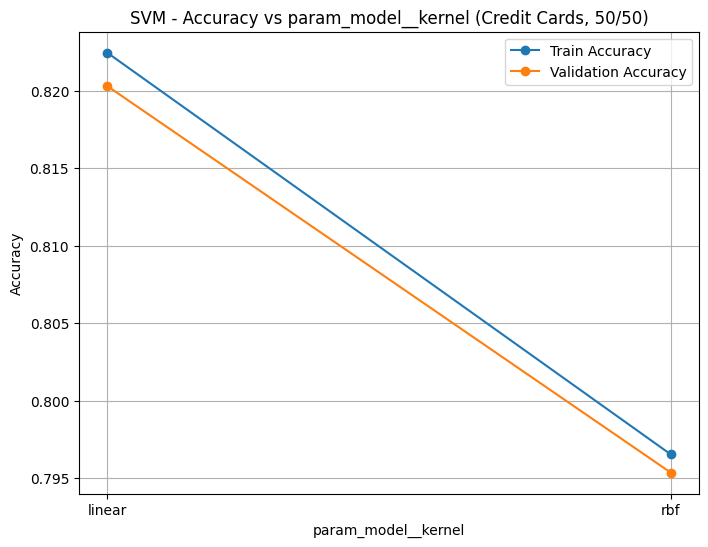

In [225]:
plot_acc_wrt_hp('SVM', param_grid_svm, cc_svm_5050, 'Credit Cards')

### Neural Network Accuracy WRT Hyperparameters

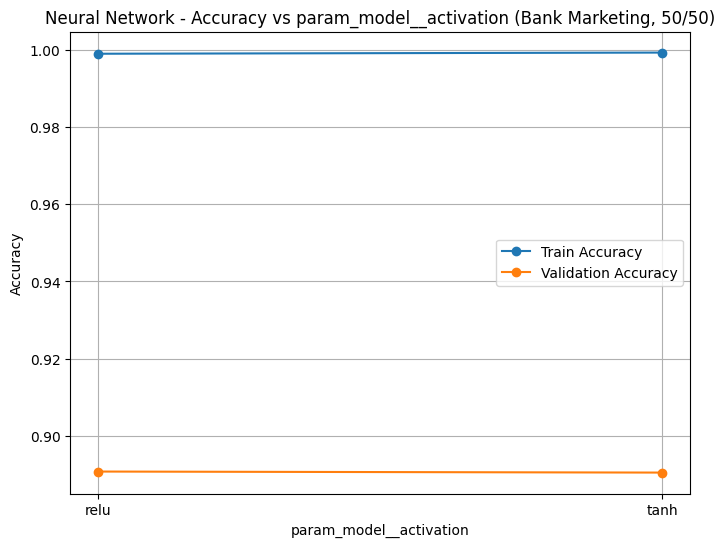

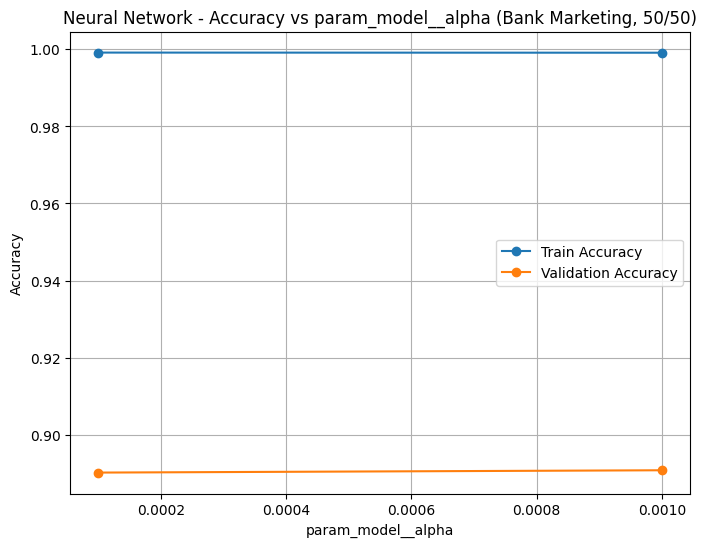

In [226]:
plot_acc_wrt_hp('Neural Network',param_grid_nn, bm_nn_5050, 'Bank Marketing')

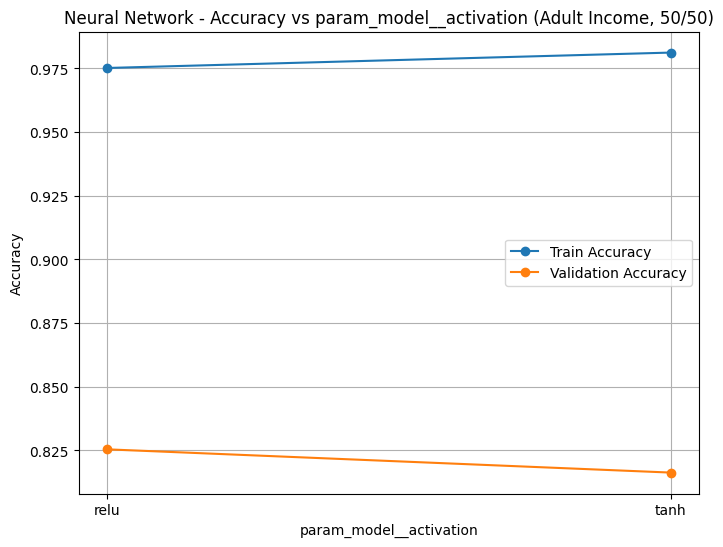

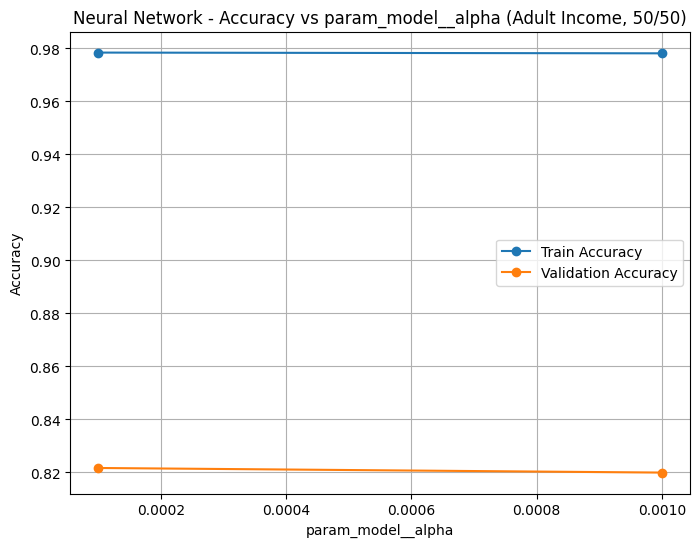

In [227]:
plot_acc_wrt_hp('Neural Network',param_grid_nn, adult_nn_5050, 'Adult Income')

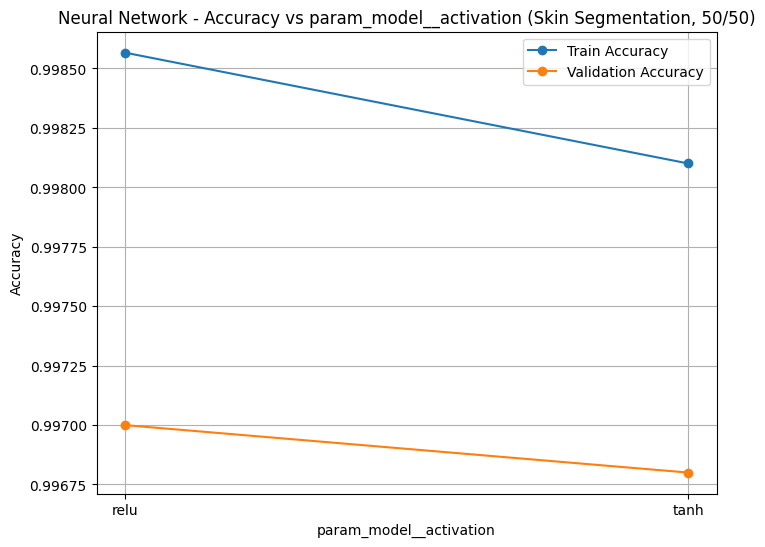

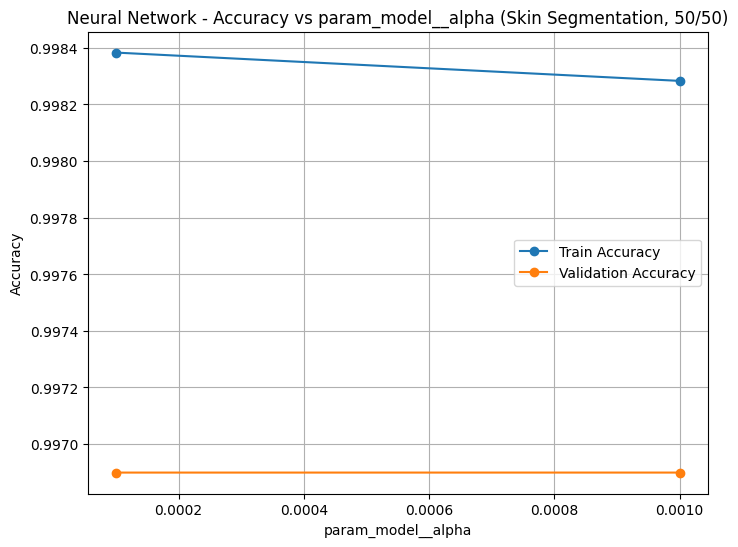

In [228]:
plot_acc_wrt_hp('Neural Network',param_grid_nn, sk_nn_5050, 'Skin Segmentation')

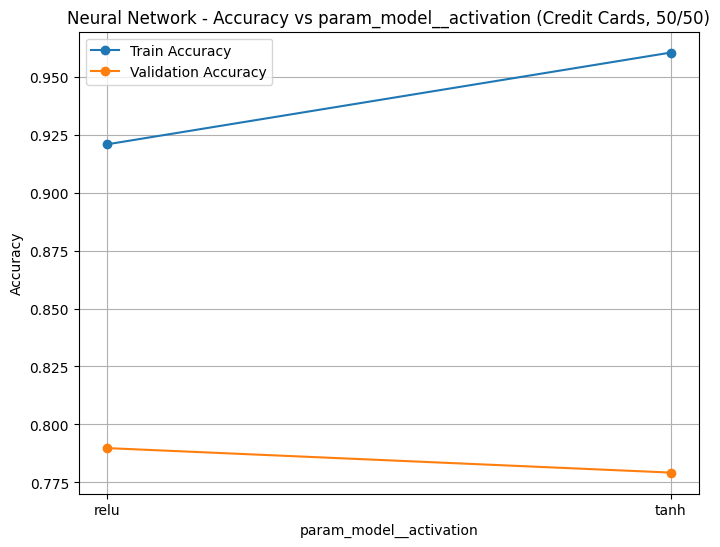

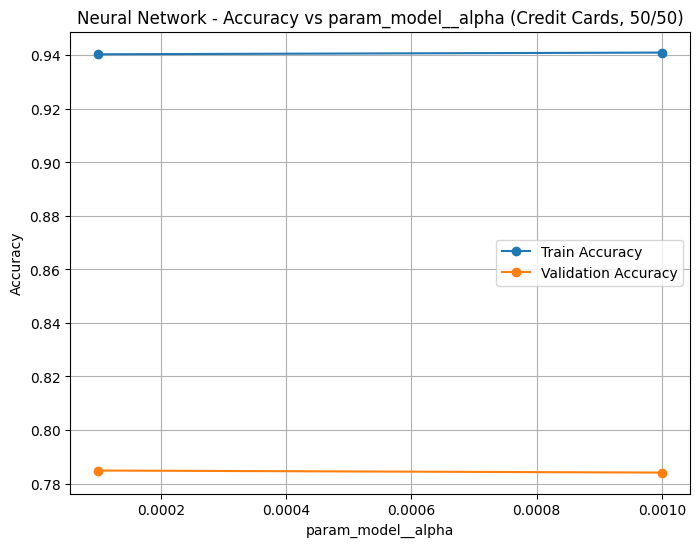

In [229]:
plot_acc_wrt_hp('Neural Network',param_grid_nn, cc_nn_5050, 'Credit Cards')

### Logistic Regression Accuracy WRT Hyperparameters

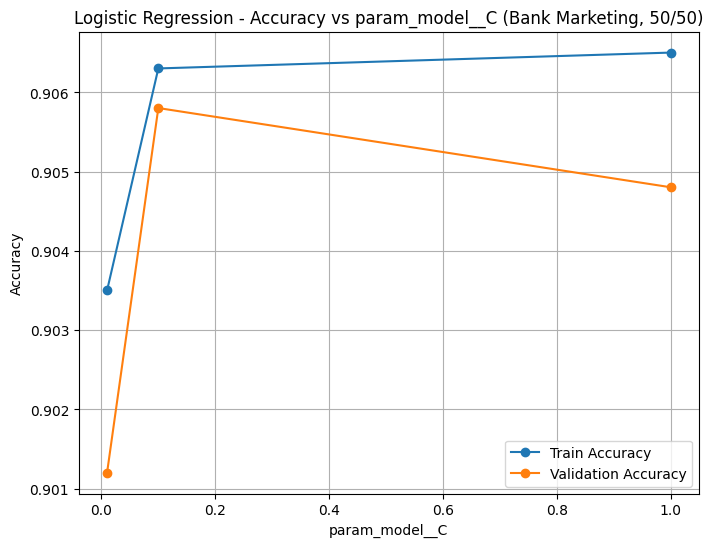

In [230]:
plot_acc_wrt_hp('Logistic Regression',param_grid_lr, bm_lr_5050, 'Bank Marketing')

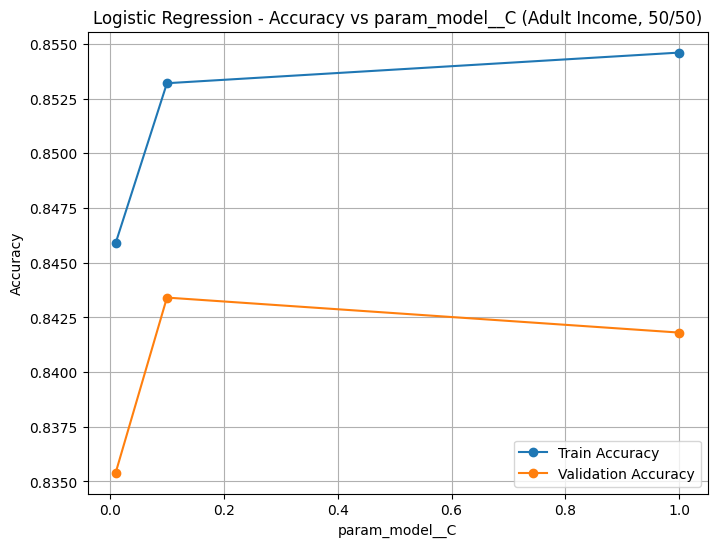

In [231]:
plot_acc_wrt_hp('Logistic Regression',param_grid_lr, adult_lr_5050, 'Adult Income')

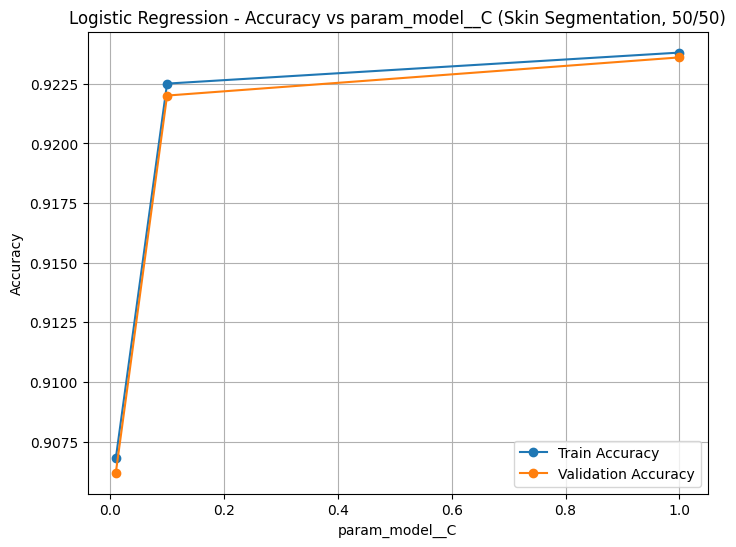

In [232]:
plot_acc_wrt_hp('Logistic Regression',param_grid_lr, sk_lr_5050, 'Skin Segmentation')

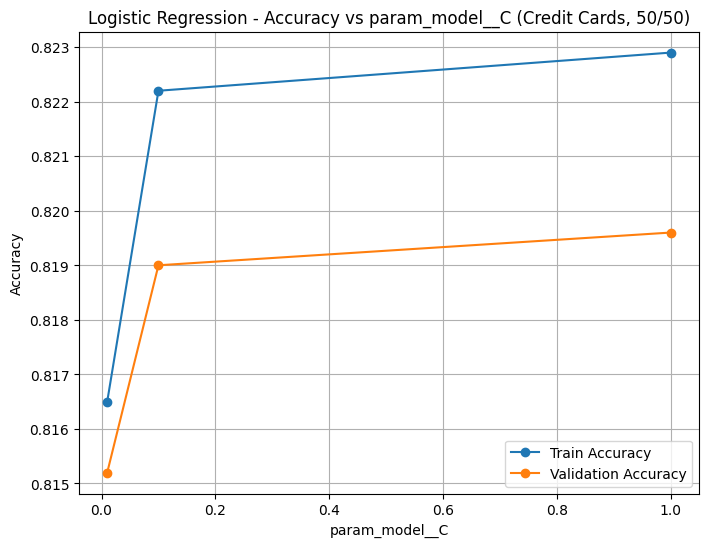

In [233]:
plot_acc_wrt_hp('Logistic Regression',param_grid_lr, cc_lr_5050, 'Credit Cards')

### KNN Accuracy WRT Hyperparameters

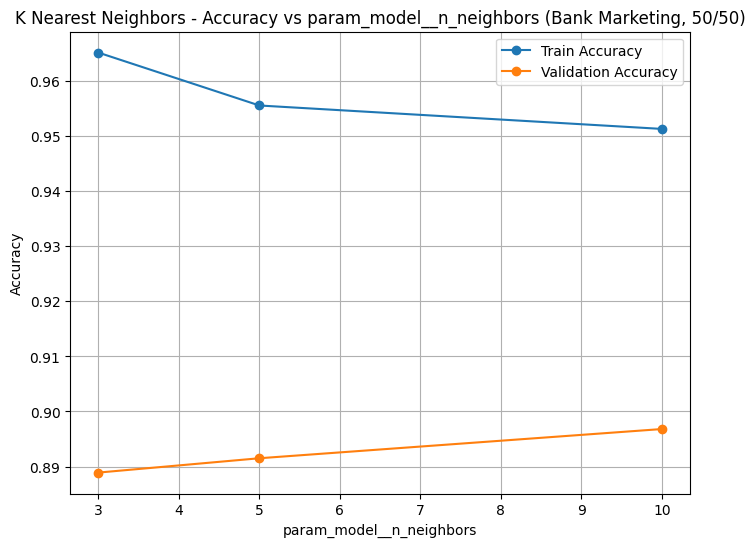

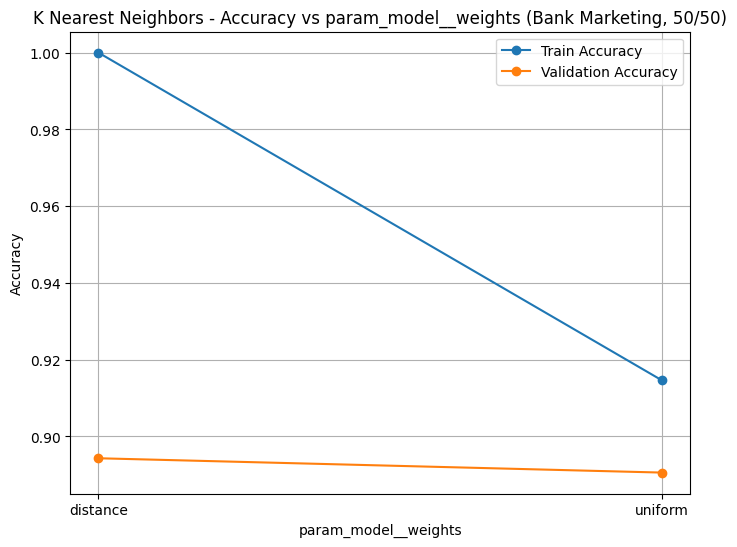

In [235]:
plot_acc_wrt_hp('K Nearest Neighbors', param_grid_knn, bm_knn_5050, 'Bank Marketing')

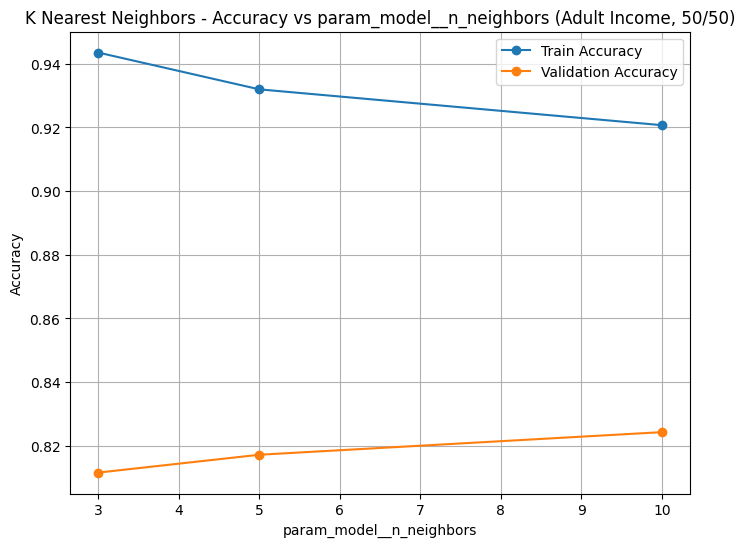

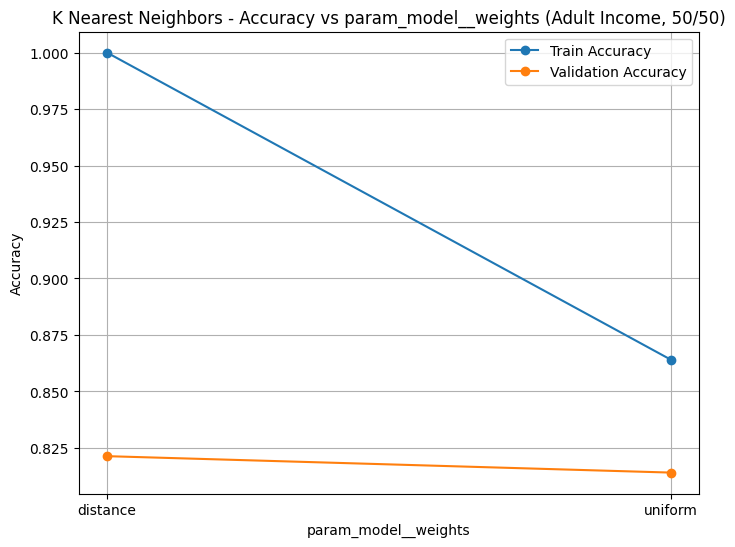

In [236]:
plot_acc_wrt_hp('K Nearest Neighbors', param_grid_knn, adult_knn_5050, 'Adult Income')

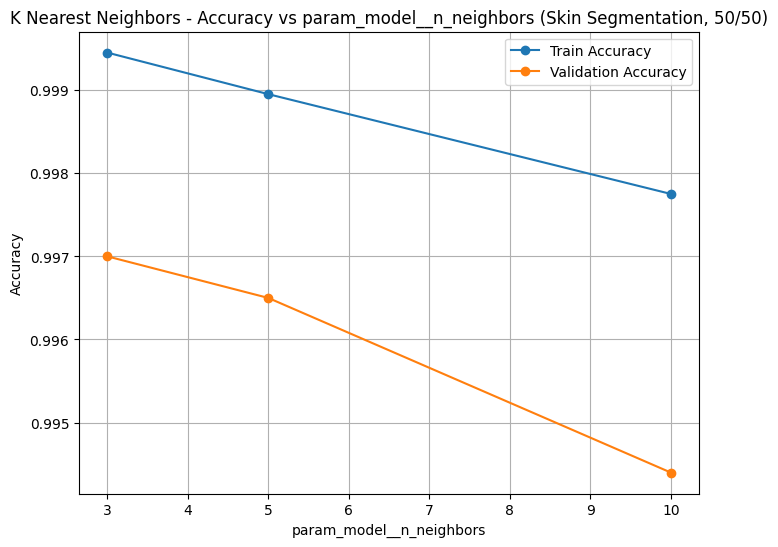

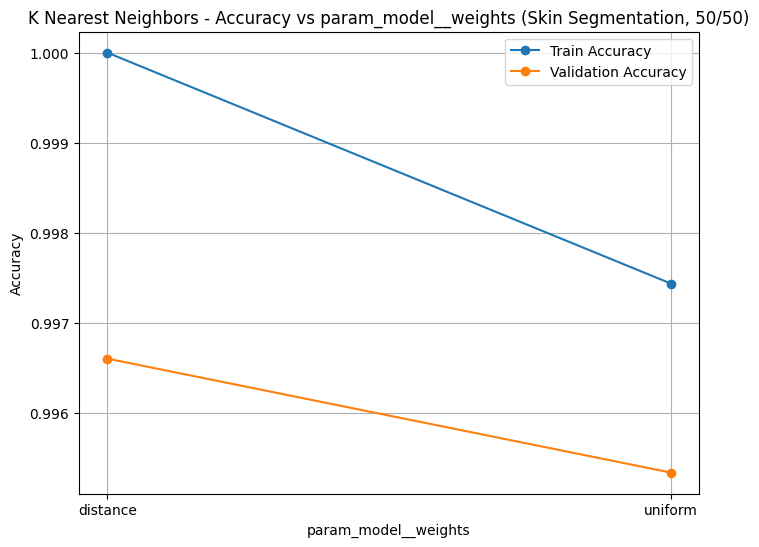

In [237]:
plot_acc_wrt_hp('K Nearest Neighbors', param_grid_knn, sk_knn_5050, 'Skin Segmentation')

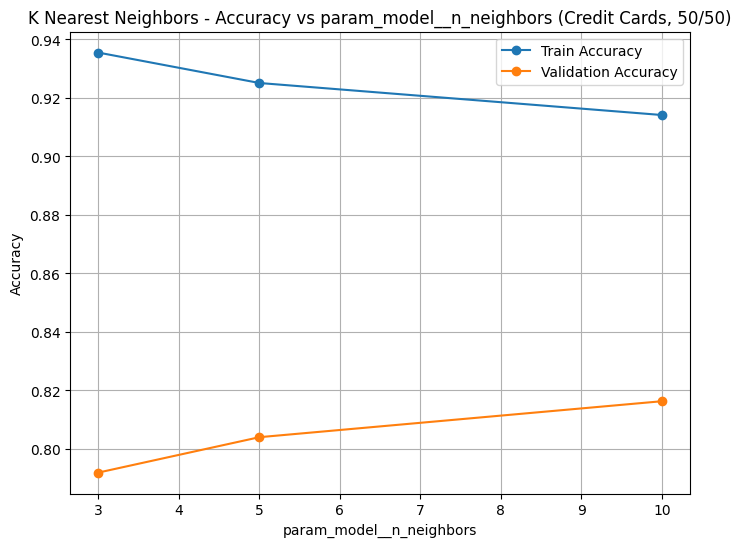

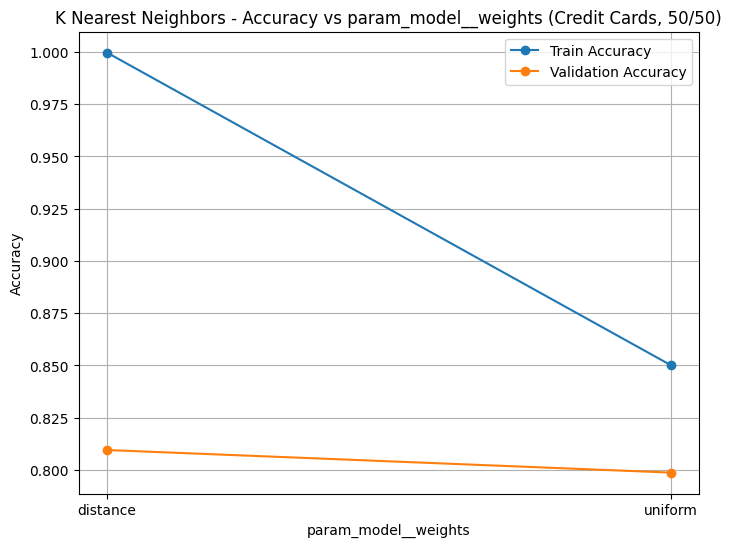

In [238]:
plot_acc_wrt_hp('K Nearest Neighbors', param_grid_knn, cc_knn_5050, 'Credit Cards')

### Random Forest Accuracy WRT Hyperparameters

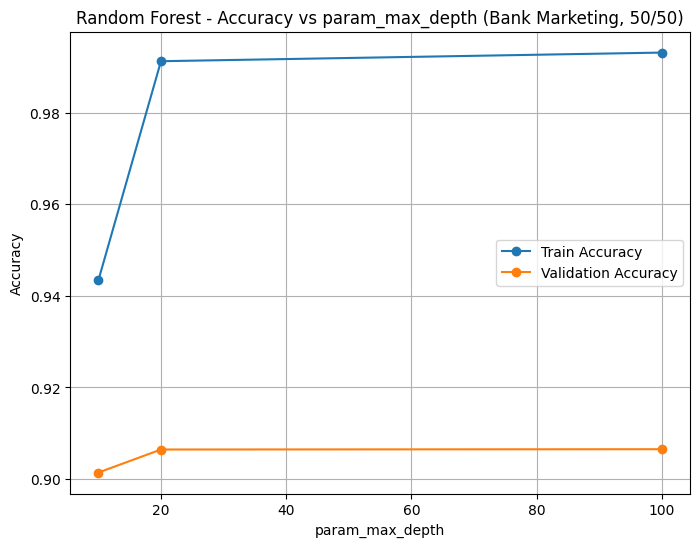

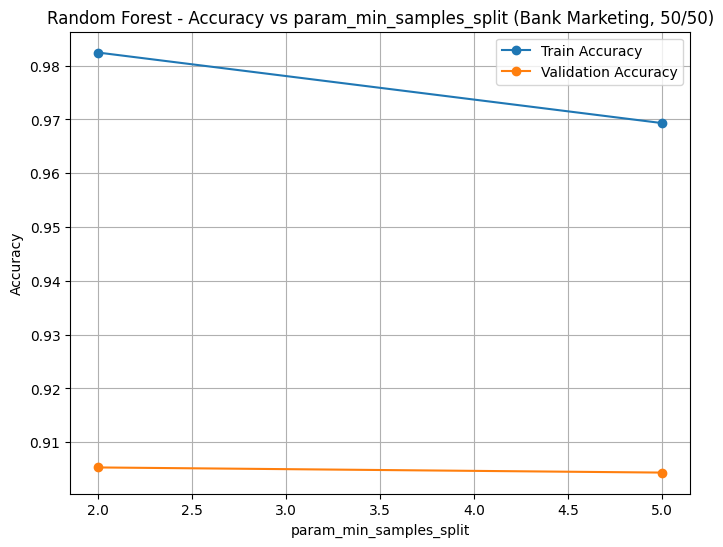

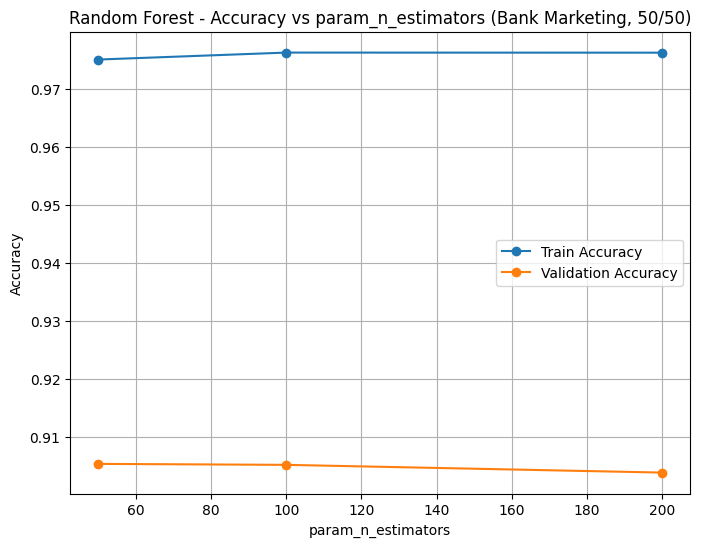

In [239]:
plot_acc_wrt_hp('Random Forest', param_grid_rf, bm_rf_5050, 'Bank Marketing')

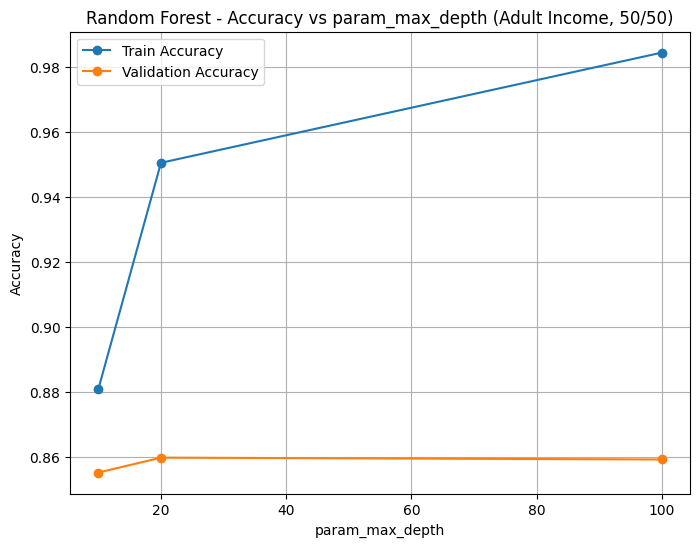

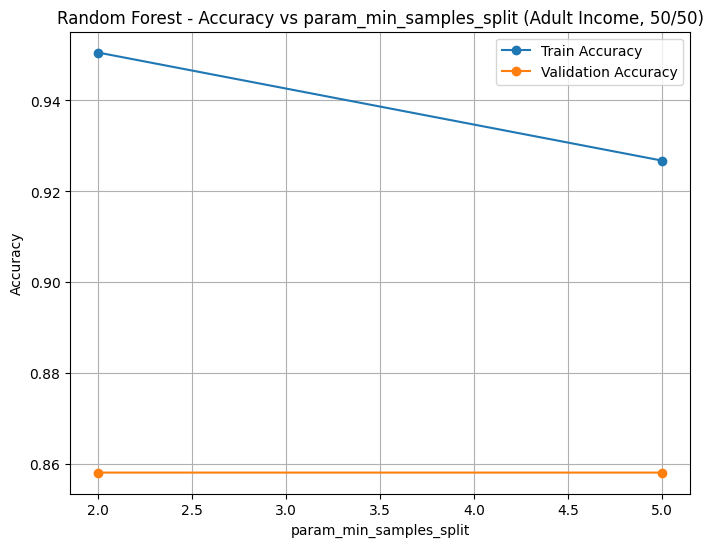

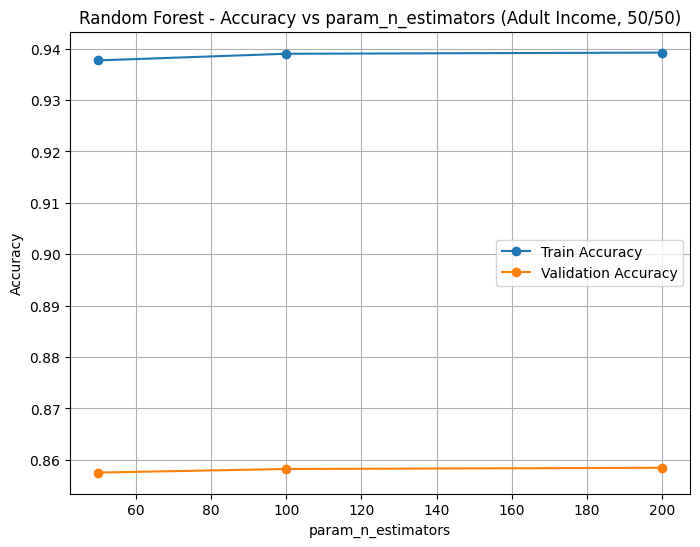

In [240]:
plot_acc_wrt_hp('Random Forest', param_grid_rf, adult_rf_5050, 'Adult Income')

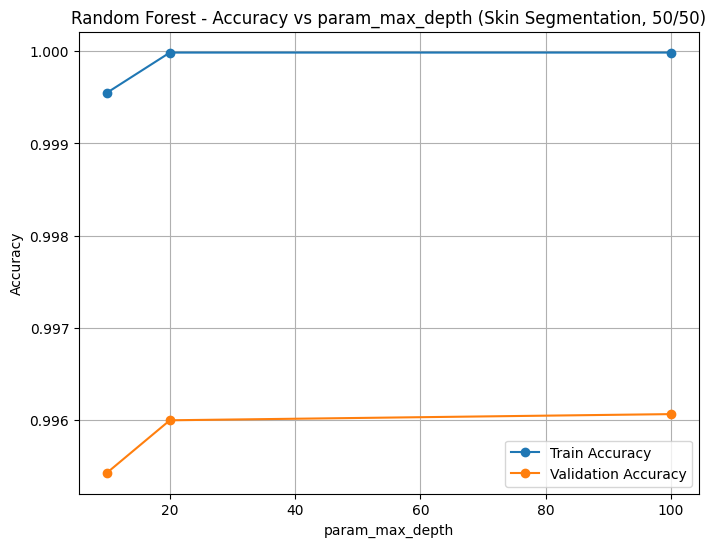

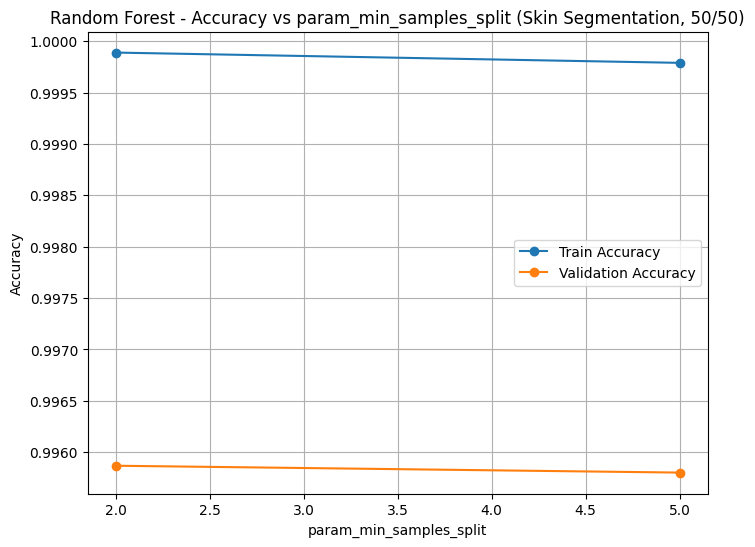

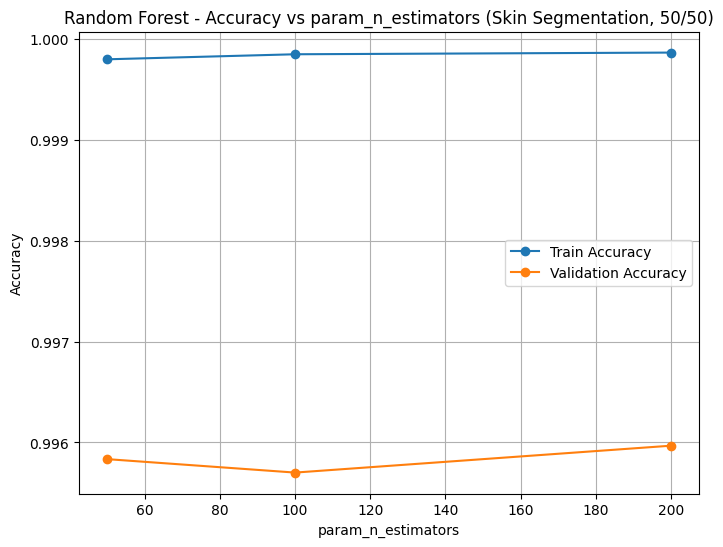

In [241]:
plot_acc_wrt_hp('Random Forest', param_grid_rf, sk_rf_5050, 'Skin Segmentation')

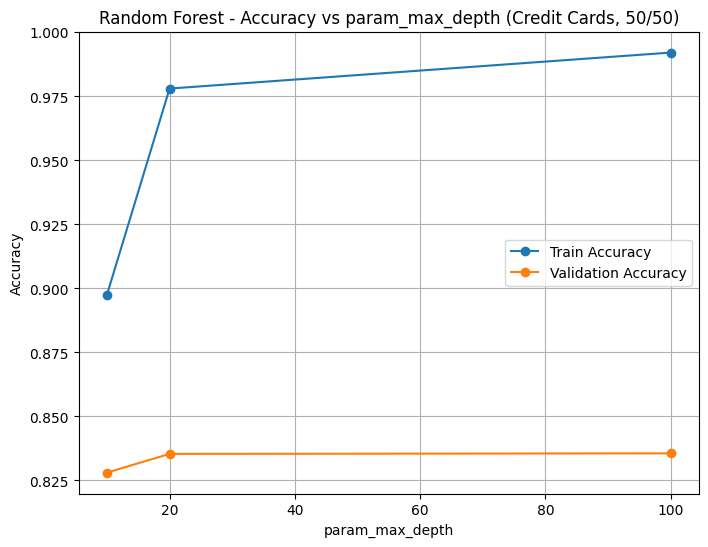

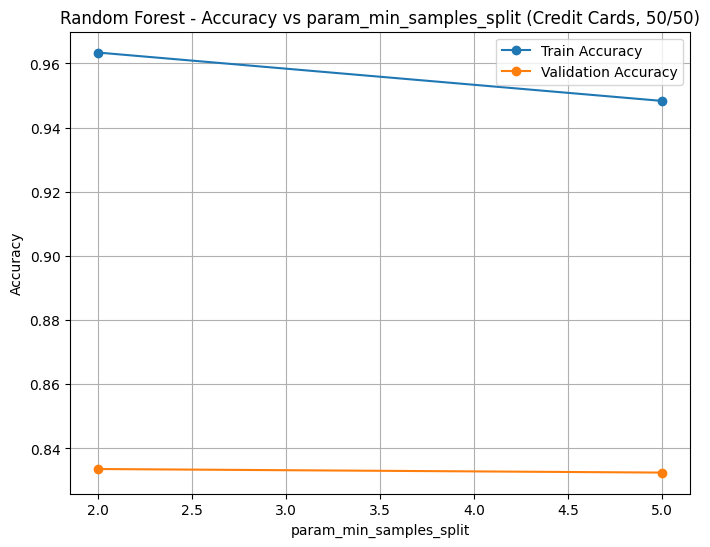

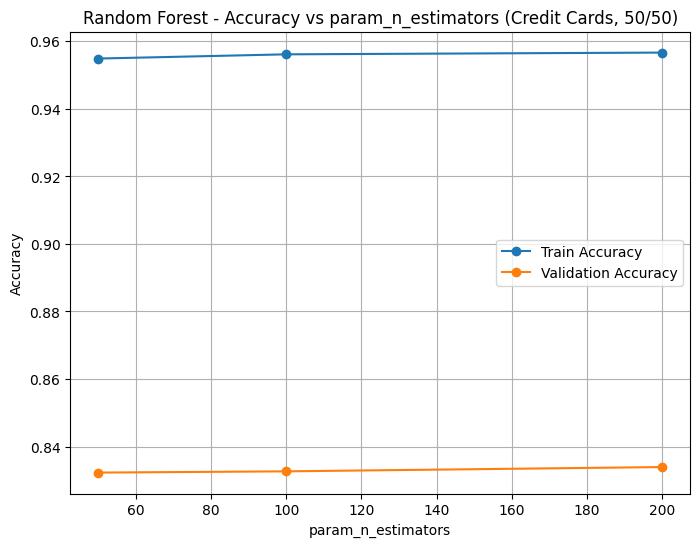

In [242]:
plot_acc_wrt_hp('Random Forest', param_grid_rf, cc_rf_5050, 'Credit Cards')

In [244]:
results_df

,Dataset,Classifier,Partition,Best Hyperparameters,Train Accuracy (Avg),Validation Accuracy (Avg),Test Accuracy (Avg),CV Results
18,adult,KNN,20/80,"{'model__n_neighbors': 10, 'model__weights': '...",0.934375,0.803671,0.813625,"{'mean_fit_time': [0.010505199432373047, 0.009..."
17,adult,Logistic Regression,20/80,"{'model__C': 0.1, 'model__penalty': 'l2'}",0.864751,0.836337,0.848750,"{'mean_fit_time': [0.012911558151245117, 0.013..."
16,adult,Neural Network,20/80,"{'model__activation': 'relu', 'model__alpha': ...",0.991313,0.806916,0.816875,"{'mean_fit_time': [5.202204465866089, 5.401602..."
19,adult,Random Forest,20/80,"{'max_depth': 100, 'min_samples_split': 5, 'n_...",0.953778,0.856253,0.849750,"{'mean_fit_time': [0.11892930666605632, 0.2374..."
15,adult,SVM,20/80,"{'model__C': 1, 'model__gamma': 0.001, 'model_...",0.842189,0.816625,0.847750,"{'mean_fit_time': [0.08844399452209473, 0.0979..."
23,adult,KNN,50/50,"{'model__n_neighbors': 10, 'model__weights': '...",0.932050,0.817702,0.830800,"{'mean_fit_time': [0.023508548736572266, 0.023..."
22,adult,Logistic Regression,50/50,"{'model__C': 0.1, 'model__penalty': 'l2'}",0.851234,0.840201,0.856000,"{'mean_fit_time': [0.032034715016682945, 0.046..."
21,adult,Neural Network,50/50,"{'model__activation': 'relu', 'model__alpha': ...",0.978225,0.820834,0.836800,"{'mean_fit_time': [8.524876435597738, 10.02379..."
24,adult,Random Forest,50/50,"{'max_depth': 20, 'min_samples_split': 2, 'n_e...",0.938650,0.858045,0.866800,"{'mean_fit_time': [0.16286714871724448, 0.3431..."
20,adult,SVM,50/50,"{'model__C': 0.1, 'model__gamma': 0.001, 'mode...",0.839113,0.827325,0.853800,"{'mean_fit_time': [1.1840178966522217, 1.29459..."


## Comparing Models on Each Dataset and Partition

<Figure size 1600x800 with 0 Axes>

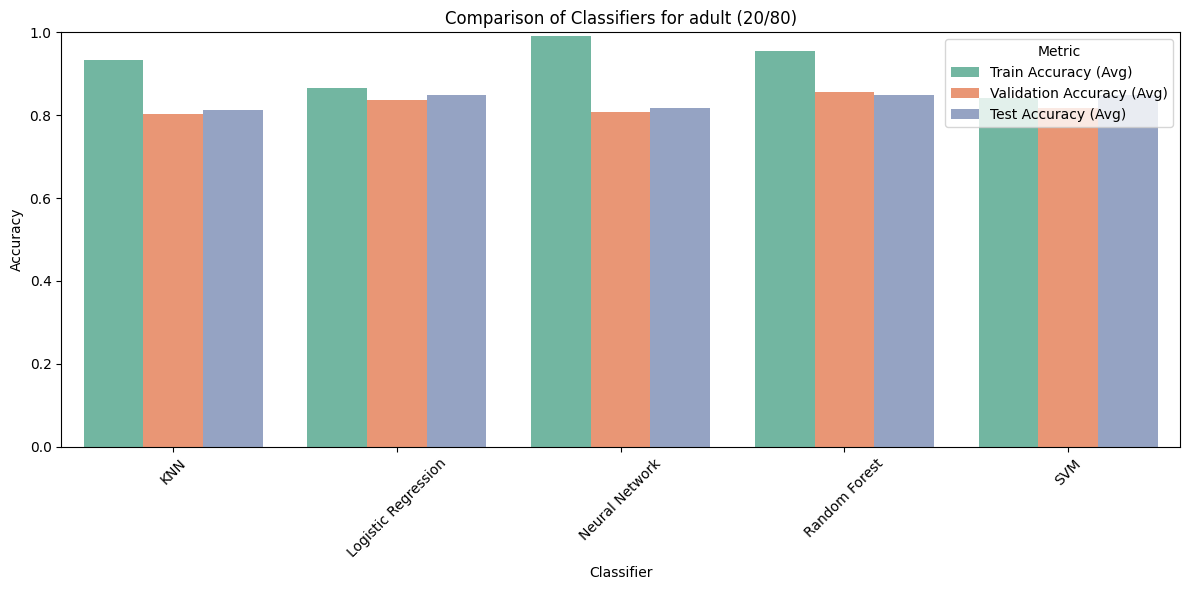

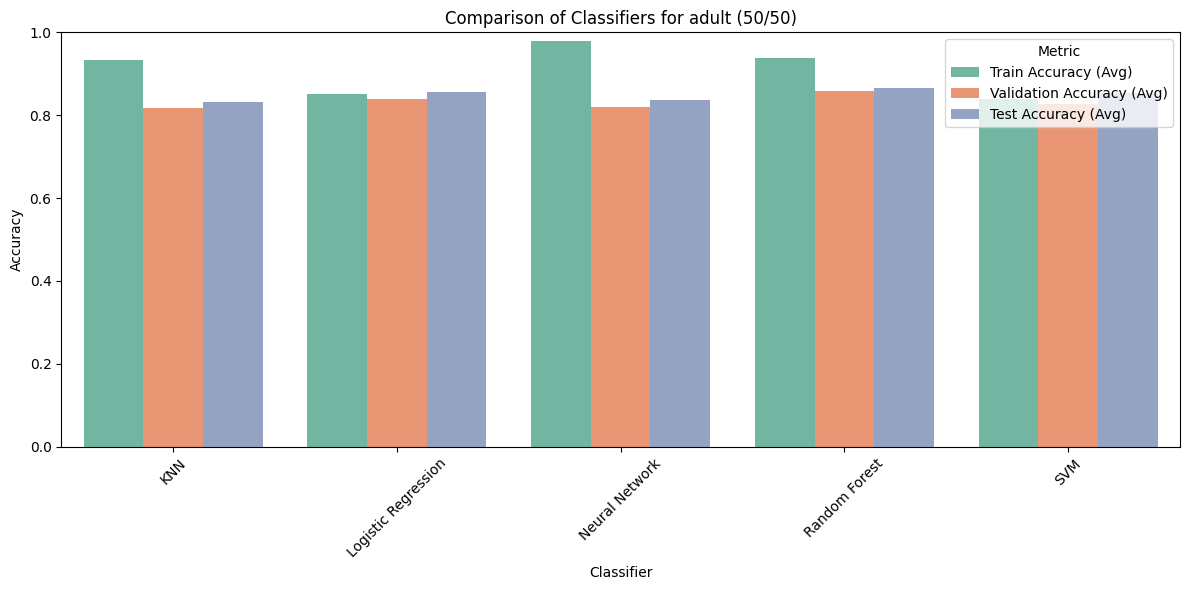

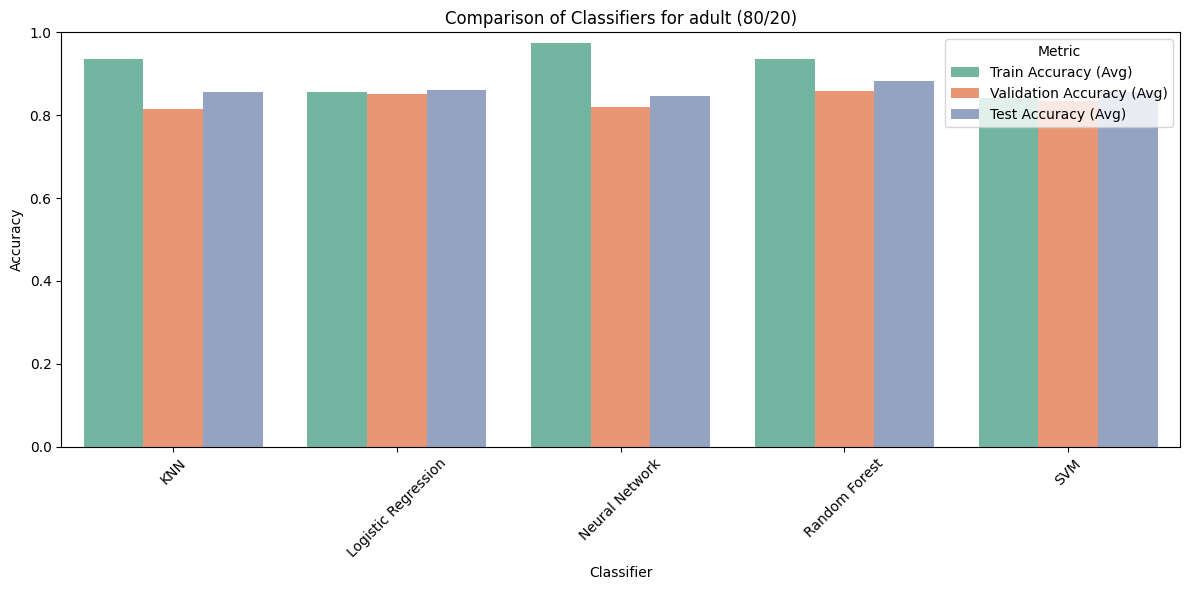

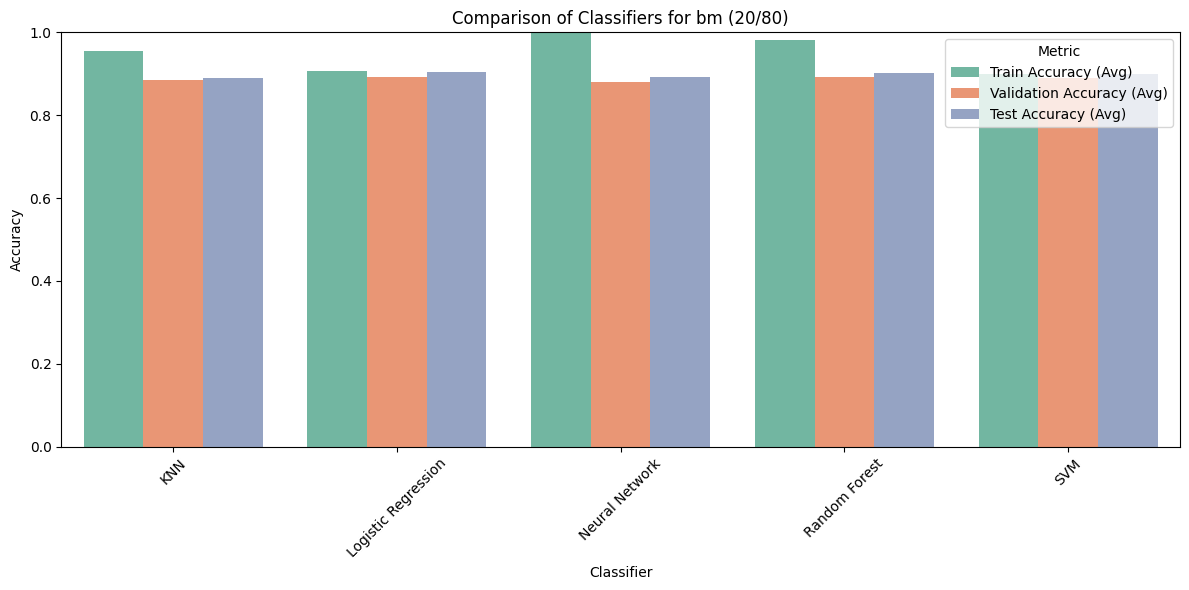

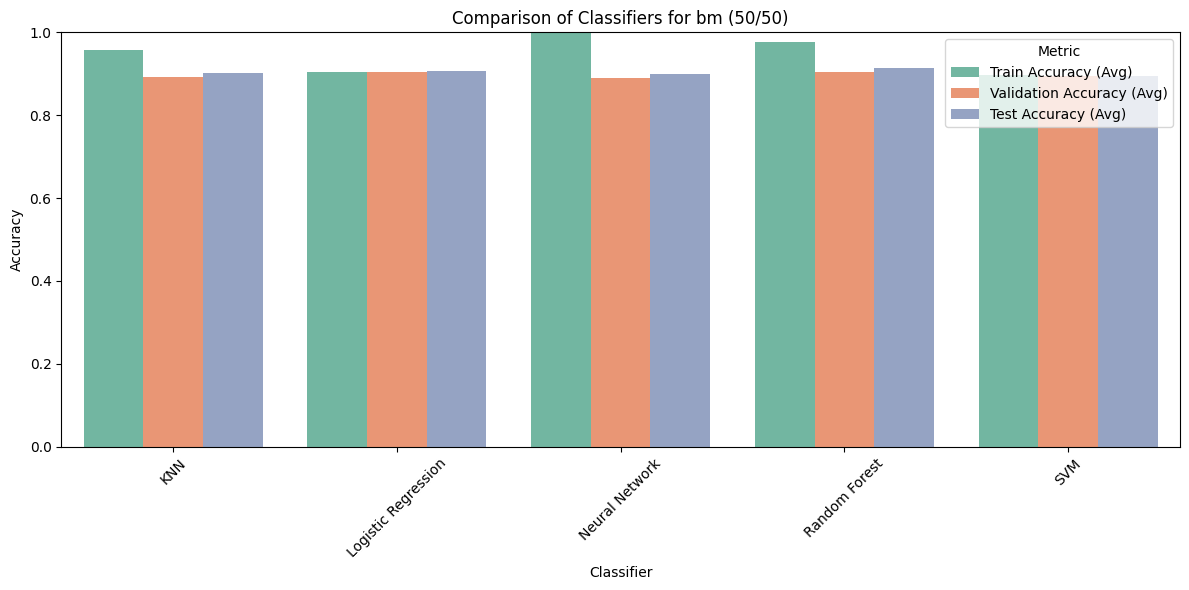

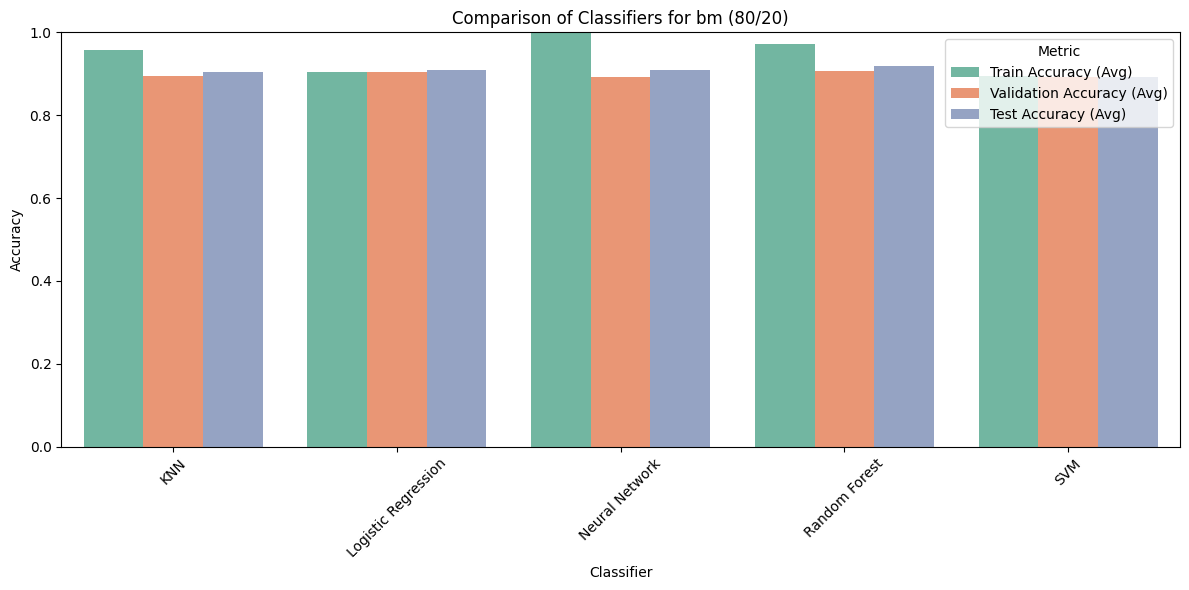

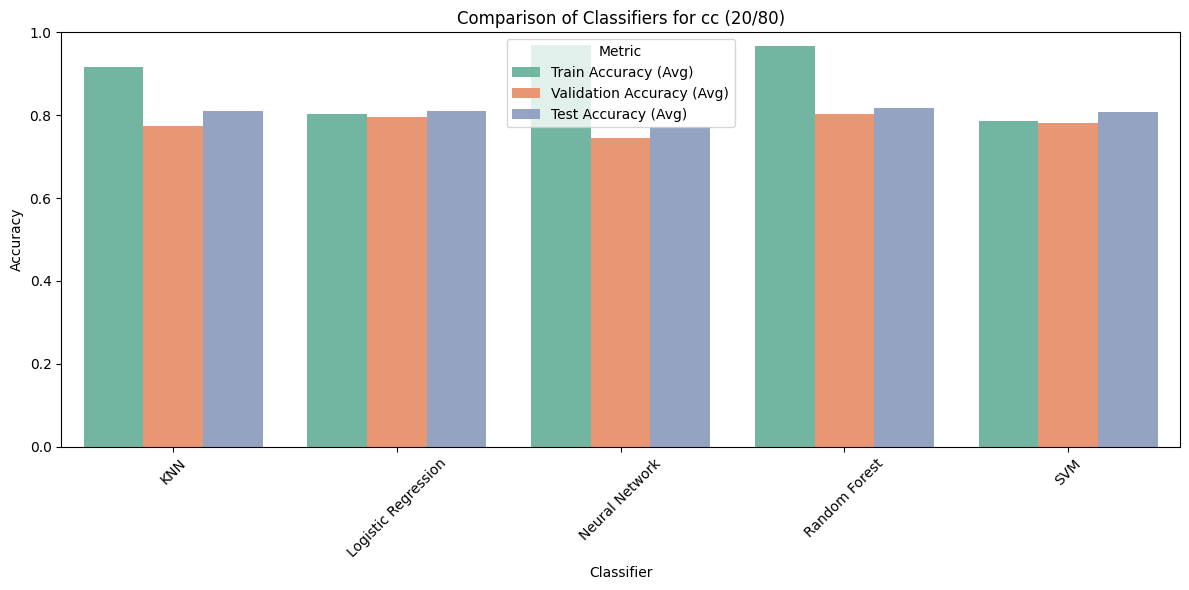

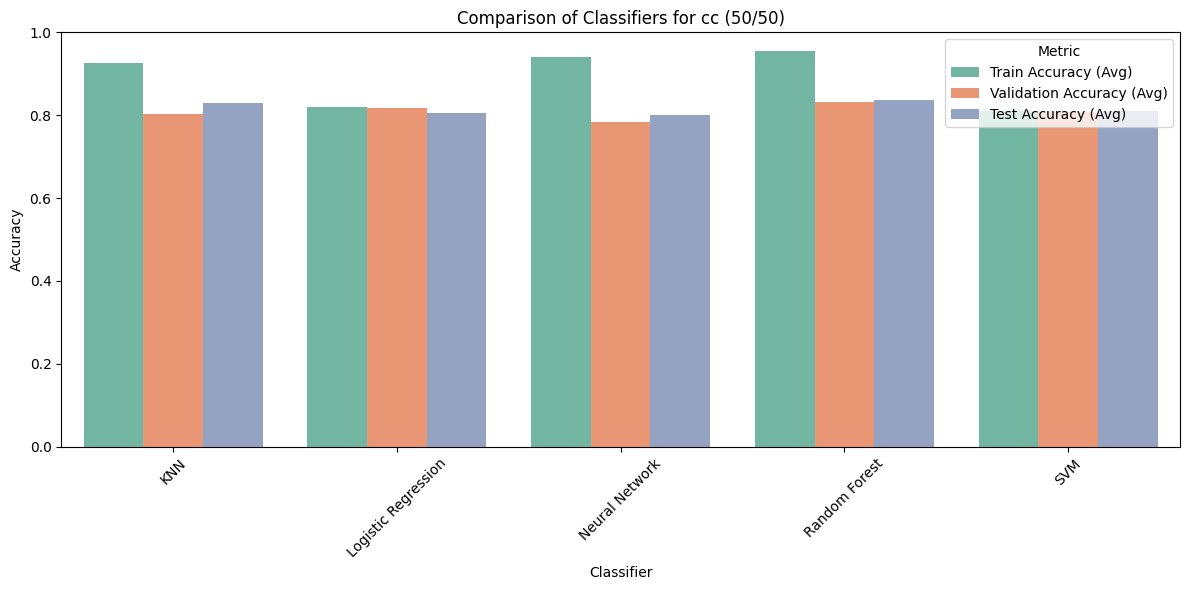

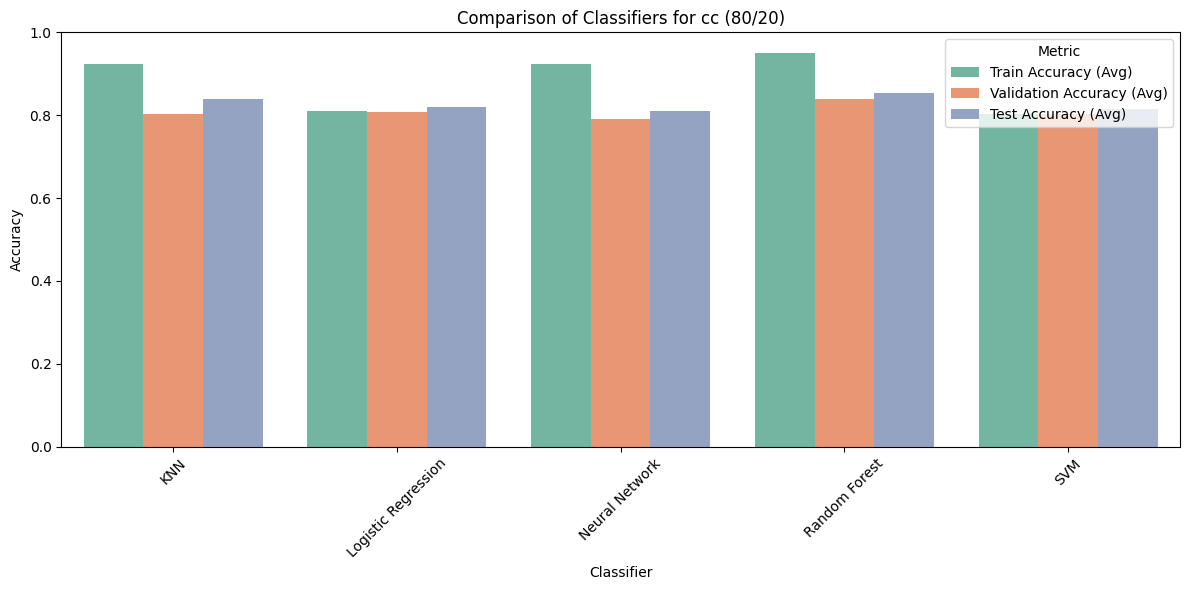

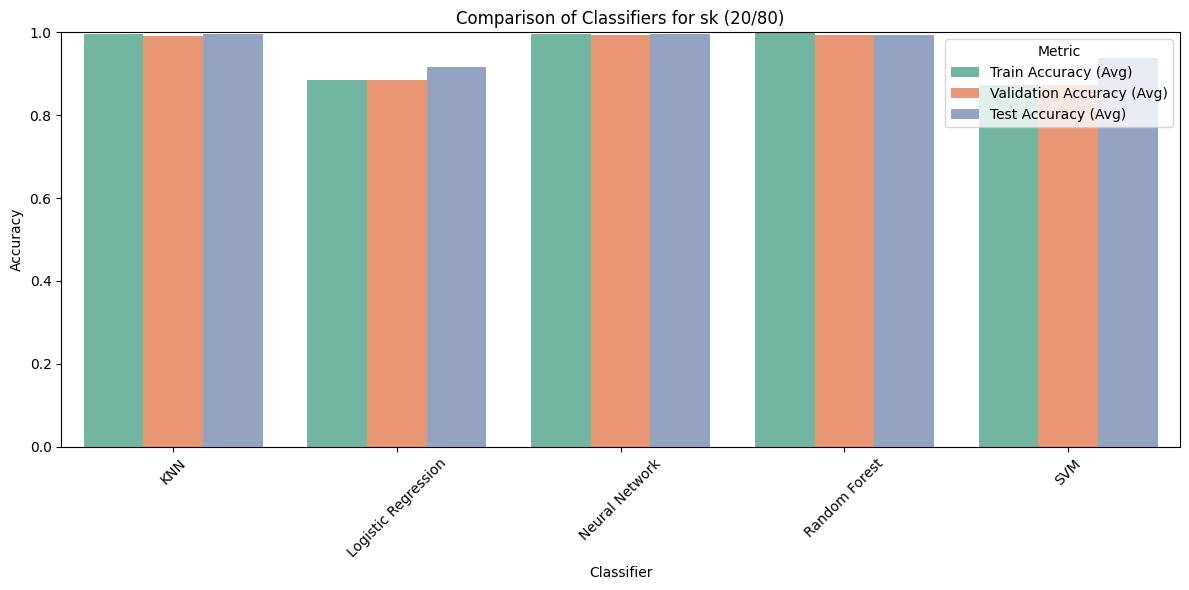

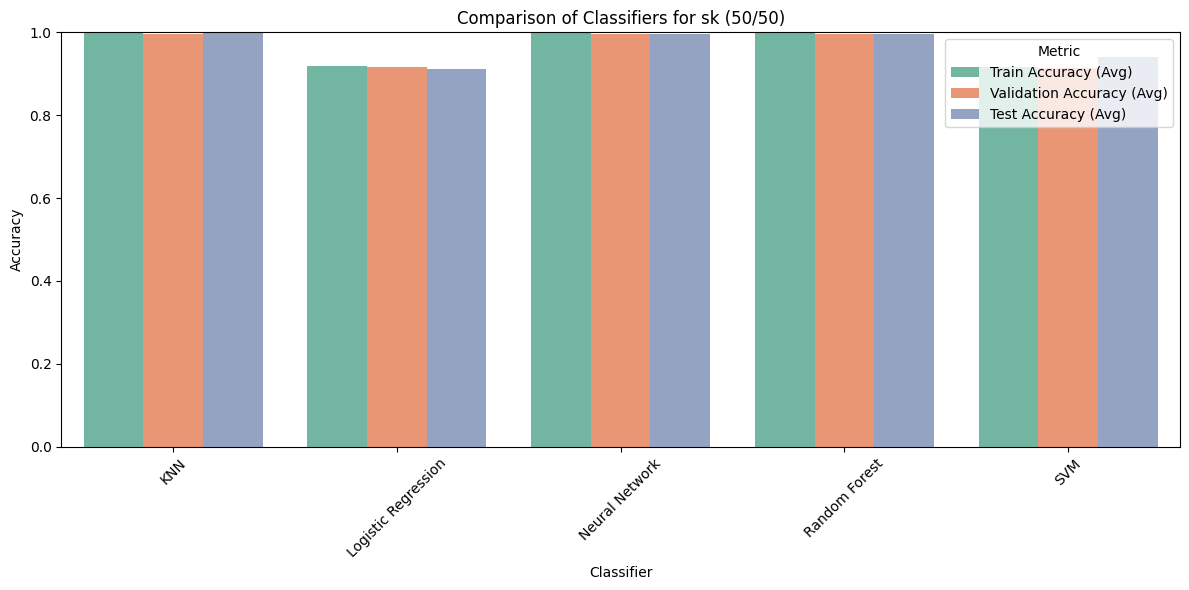

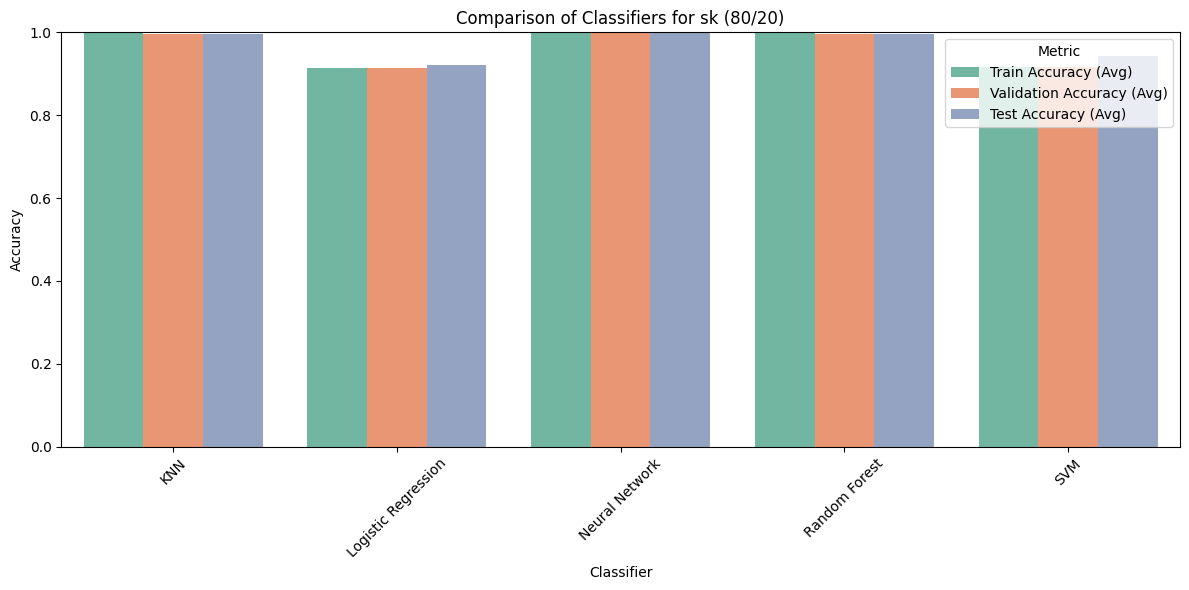

In [246]:
results_df = results_df.sort_values(['Dataset', 'Partition', 'Classifier'])

plt.figure(figsize=(16, 8))

for dataset in results_df['Dataset'].unique():
    dataset_df = results_df[results_df['Dataset'] == dataset]
    
    for partition in dataset_df['Partition'].unique():
        partition_df = dataset_df[dataset_df['Partition'] == partition]
        
        plot_df = partition_df.melt(
            id_vars=['Classifier'], 
            value_vars=['Train Accuracy (Avg)', 'Validation Accuracy (Avg)', 'Test Accuracy (Avg)'], 
            var_name='Metric', 
            value_name='Accuracy'
        )
        
        plt.figure(figsize=(12, 6))
        sns.barplot(
            data=plot_df, 
            x='Classifier', 
            y='Accuracy', 
            hue='Metric', 
            palette='Set2'
        )
        
        plt.title(f"Comparison of Classifiers for {dataset} ({partition})")
        plt.xlabel("Classifier")
        plt.ylabel("Accuracy")
        plt.ylim(0, 1)
        plt.legend(title="Metric")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

## Comparing Model Accuracies on Different Partitions

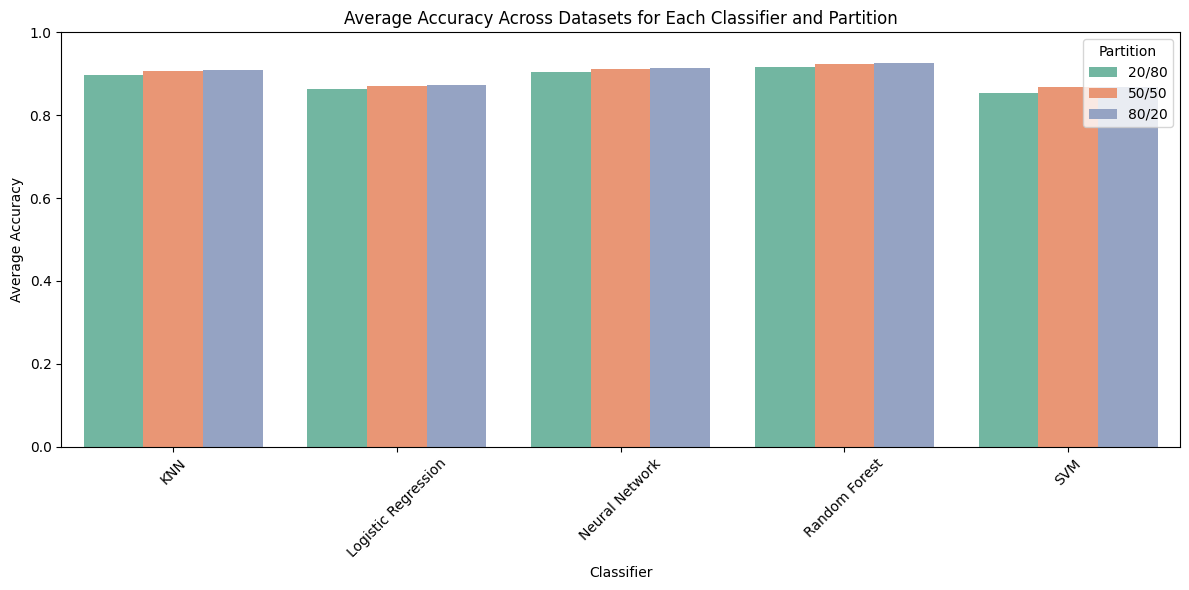

In [250]:
avg_accuracy_df = results_df.groupby(['Classifier', 'Partition'])[['Train Accuracy (Avg)', 'Validation Accuracy (Avg)', 'Test Accuracy (Avg)']].mean().reset_index()

avg_accuracy_df['Average Accuracy'] = avg_accuracy_df[['Train Accuracy (Avg)', 'Validation Accuracy (Avg)', 'Test Accuracy (Avg)']].mean(axis=1)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=avg_accuracy_df, 
    x='Classifier', 
    y='Average Accuracy', 
    hue='Partition', 
    palette='Set2'
)

plt.title("Average Accuracy Across Datasets for Each Classifier and Partition")
plt.xlabel("Classifier")
plt.ylabel("Average Accuracy")
plt.ylim(0, 1)
plt.legend(title="Partition")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
